In [260]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [261]:
import warnings
warnings.filterwarnings("ignore");

In [262]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [263]:
# product_category_df.csv
url = "https://drive.google.com/file/d/1_Jzth7FlqUmVZbf4S8K7K-Xh-3VuGwAX/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
product_category_df = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1T8JTBWkn4ooNn7mFa1NtB7iohuvahIco/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# revised_orderlines_qu.csv
url = "https://drive.google.com/file/d/1Y8qFscEAn9dYEoDPoayHfXF-07JiFBgB/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
revised_orderlines_qu = pd.read_csv(path)

# revised_orders_qu.csv
url = "https://drive.google.com/file/d/1_BwjcZVHkd3hgjlAcpbz6jjkQiYClny_/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
revised_orders_qu = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/18Kgl8lSEn_OJ74GV-1u7cwmpbK_A7ORd/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [264]:
products_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [265]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
 6   category  9992 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 546.6+ KB


In [266]:
revised_orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ MB


In [267]:
revised_orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      40985 non-null  int64  
 1   created_date  40985 non-null  object 
 2   total_paid    40985 non-null  float64
 3   state         40985 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [268]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [269]:
# Convert 'created_date' to datetime format
revised_orders_qu['created_date'] = pd.to_datetime(revised_orders_qu['created_date'])

In [270]:
#What is the time period that the dataset covers?
start_date = revised_orders_qu['created_date'].min()
end_date = revised_orders_qu['created_date'].max()
print(f"Data covers from {start_date} to {end_date}")

Data covers from 2017-01-01 01:51:47 to 2018-03-14 12:03:52


In [271]:
# Define year and month
start_year = start_date.year
start_month = start_date.month

end_year = end_date.year
end_month = end_date.month

# Print results
print(f"Data covers from {start_month:02d}/{start_year} to {end_month:02d}/{end_year}")

Data covers from 01/2017 to 03/2018


In [272]:
revised_orders_qu

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98,Completed
40981,527070,2018-03-14 11:50:48,24.97,Completed
40982,527074,2018-03-14 11:51:42,24.97,Completed
40983,527096,2018-03-14 11:58:40,34.96,Completed


In [273]:
revised_orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40985 entries, 0 to 40984
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      40985 non-null  int64         
 1   created_date  40985 non-null  datetime64[ns]
 2   total_paid    40985 non-null  float64       
 3   state         40985 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [274]:
#total revenue by refering to state  = 'completed'
total_revenue = revised_orders_qu['total_paid'].sum()
print(f"Total revenue: €{total_revenue:,.2f}")

Total revenue: €7,978,675.60


In [275]:
#Timeline Plot of Order Counts per Month
revised_orders_qu['year_month'] = revised_orders_qu['created_date'].dt.to_period('M')

In [276]:
revised_orders_qu['year_month']

,year_month
0,2017-11
1,2017-12
2,2017-02
3,2017-06
4,2017-01
...,...
40980,2018-03
40981,2018-03
40982,2018-03
40983,2018-03


In [277]:
#This counts unique order IDs per month.
monthly_order_counts = revised_orders_qu.groupby('year_month').agg(order_count=('order_id', 'nunique')).reset_index()
monthly_order_counts

,year_month,order_count
0,2017-01,4597
1,2017-02,2045
2,2017-03,163
3,2017-04,1460
4,2017-05,1651
5,2017-06,1329
6,2017-07,3074
7,2017-08,2098
8,2017-09,1880
9,2017-10,2768


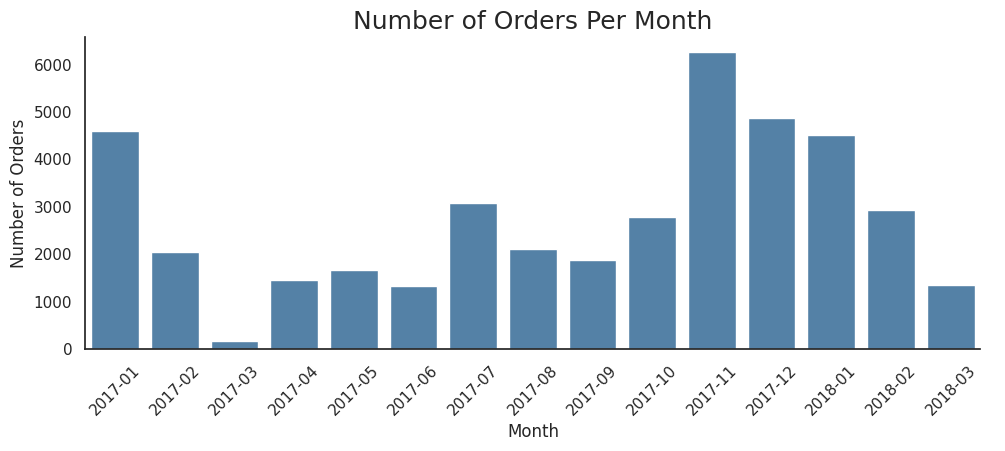

In [278]:
monthly_order_plot=sns.catplot(kind = "bar", data=monthly_order_counts, x='year_month', y='order_count', color='steelblue', height=4, aspect=2.5)
monthly_order_plot.ax.set_title("Number of Orders Per Month", fontsize=18)
monthly_order_plot.set_axis_labels("Month", "Number of Orders")
monthly_order_plot.set_xticklabels(rotation=45);

In [279]:
#Overall Revenue Over Time plot
monthly_revenue = revised_orders_qu.groupby('year_month')['total_paid'].sum().reset_index()
monthly_revenue

,year_month,total_paid
0,2017-01,620623.31
1,2017-02,341848.26
2,2017-03,24976.81
3,2017-04,230994.54
4,2017-05,333930.28
5,2017-06,292248.33
6,2017-07,610519.07
7,2017-08,385907.56
8,2017-09,395974.90
9,2017-10,558111.08


In [280]:
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   year_month  15 non-null     period[M]
 1   total_paid  15 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 372.0 bytes


In [281]:
revised_orders_qu['total_paid'] = revised_orders_qu['total_paid'].astype(str)
revised_orders_qu['total_paid'] = pd.to_numeric(revised_orders_qu['total_paid'], errors='coerce')

In [282]:
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   year_month  15 non-null     period[M]
 1   total_paid  15 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 372.0 bytes


In [283]:
revised_orders_qu['year_month'] = revised_orders_qu['created_date'].dt.to_period('M').dt.to_timestamp()
revised_orders_qu['year_month'] = revised_orders_qu['created_date'].dt.to_period('M')
monthly_revenue = revised_orders_qu.groupby('year_month')['total_paid'].sum().reset_index()
monthly_revenue

,year_month,total_paid
0,2017-01,620623.31
1,2017-02,341848.26
2,2017-03,24976.81
3,2017-04,230994.54
4,2017-05,333930.28
5,2017-06,292248.33
6,2017-07,610519.07
7,2017-08,385907.56
8,2017-09,395974.90
9,2017-10,558111.08


In [284]:
print(monthly_revenue.dtypes)
print(monthly_revenue.head())

year_month    period[M]
total_paid      float64
dtype: object
  year_month  total_paid
0    2017-01   620623.31
1    2017-02   341848.26
2    2017-03    24976.81
3    2017-04   230994.54
4    2017-05   333930.28


In [285]:
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

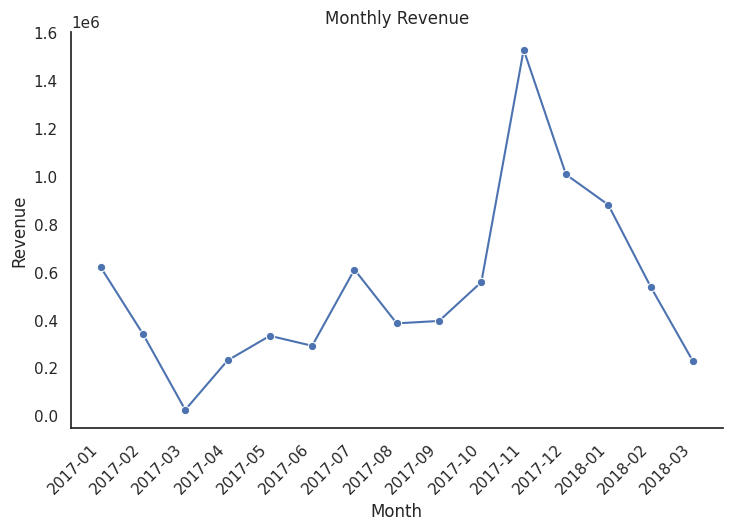

In [286]:
monthly_revenue_plot = sns.relplot(kind = "line", data=monthly_revenue, x='year_month', y='total_paid', marker='o', height=5, aspect=1.5);
monthly_revenue_plot.set(title="Monthly Revenue", xlabel="Month", ylabel="Revenue")
for ax in monthly_revenue_plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right');

#PLOT OF ORDER AND REVENUE BY MONTH ON LINE GRAPH
orders_qu
change datetime
monthly revenue = grouped by year month, agg by total_paid as sum
monthly_order = grouped by year month, agg by count of unit order_id
merge both dataset and plot bar and line on same plot

In [287]:
revised_orders_qu['year_month'] = revised_orders_qu['created_date'].dt.to_period('M').dt.to_timestamp()
revised_orders_qu['year_month'] = revised_orders_qu['created_date'].dt.to_period('M')
monthly_revenue = revised_orders_qu.groupby('year_month')['total_paid'].sum().reset_index()
monthly_revenue

,year_month,total_paid
0,2017-01,620623.31
1,2017-02,341848.26
2,2017-03,24976.81
3,2017-04,230994.54
4,2017-05,333930.28
5,2017-06,292248.33
6,2017-07,610519.07
7,2017-08,385907.56
8,2017-09,395974.90
9,2017-10,558111.08


In [288]:
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   year_month  15 non-null     period[M]
 1   total_paid  15 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 372.0 bytes


In [289]:
#monthly_revenue['year_month'] = monthly_revenue['year_month'].dt.to_period('M')
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

In [290]:
monthly_revenue=monthly_revenue.copy()
monthly_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_month  15 non-null     object 
 1   total_paid  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


In [291]:
monthly_revenue.head()

,year_month,total_paid
0,2017-01,620623.31
1,2017-02,341848.26
2,2017-03,24976.81
3,2017-04,230994.54
4,2017-05,333930.28


In [292]:
monthly_order_counts['year_month'] = monthly_order_counts['year_month'].astype(str)

In [293]:

monthly_order_counts=monthly_order_counts.copy()
monthly_order_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year_month   15 non-null     object
 1   order_count  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [294]:
monthly_order_counts.head()

,year_month,order_count
0,2017-01,4597
1,2017-02,2045
2,2017-03,163
3,2017-04,1460
4,2017-05,1651


In [295]:
#Merge Revenue and Orders per month on same plot
monthly_statusquo = pd.merge(monthly_revenue, monthly_order_counts, on="year_month")
monthly_statusquo

,year_month,total_paid,order_count
0,2017-01,620623.31,4597
1,2017-02,341848.26,2045
2,2017-03,24976.81,163
3,2017-04,230994.54,1460
4,2017-05,333930.28,1651
5,2017-06,292248.33,1329
6,2017-07,610519.07,3074
7,2017-08,385907.56,2098
8,2017-09,395974.90,1880
9,2017-10,558111.08,2768


In [296]:
monthly_statusquo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year_month   15 non-null     object 
 1   total_paid   15 non-null     float64
 2   order_count  15 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [297]:
#we convert datetime to string for ease of filtering and plotting
monthly_statusquo["year_month"] = monthly_statusquo["year_month"].astype(str)

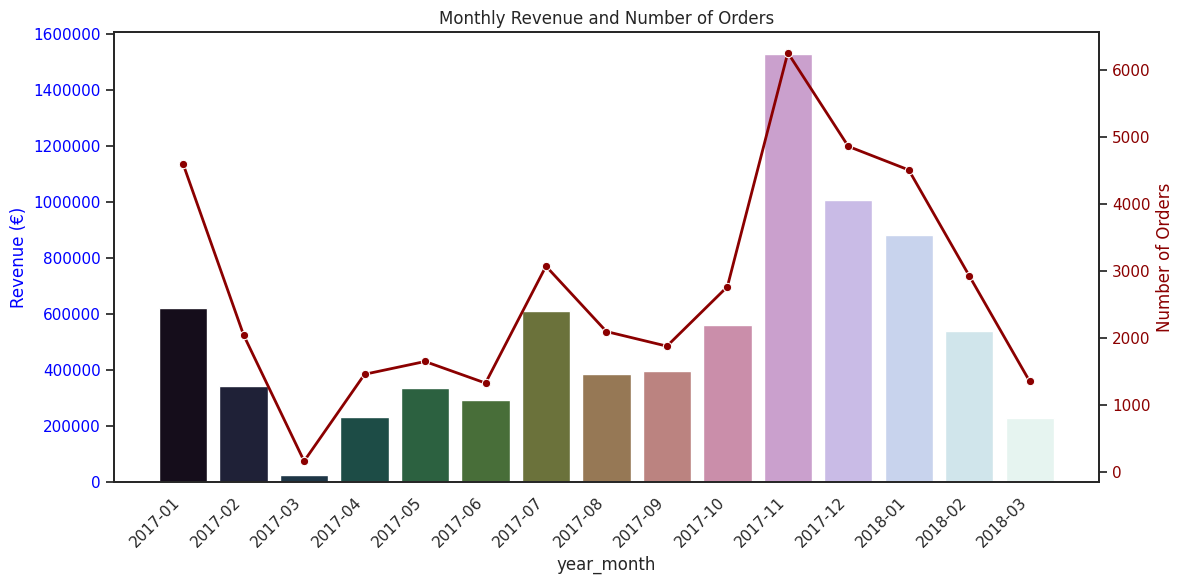

In [298]:
sns.set(style="white")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for revenue on 1st y-axis
sns.barplot(data=monthly_statusquo, x="year_month", y="total_paid", ax=ax1, hue="year_month",palette="cubehelix")
ax1.set_ylabel("Revenue (€)", color="blue")
ax1.ticklabel_format(style='plain', axis='y')
ax1.tick_params(axis='y', labelcolor="blue")

# Line plot for number of orders on a 2nd y-axis
ax2 = ax1.twinx()
sns.lineplot(data=monthly_statusquo, x="year_month", y="order_count", ax=ax2, color="darkred", marker="o", linewidth=2)
ax2.set_ylabel("Number of Orders", color="darkred")
ax2.tick_params(axis='y', labelcolor="darkred")

# Final plotting
plt.title("Monthly Revenue and Number of Orders")
for ax in [ax1, ax2]: ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show();


#What are the most sold products?

In [299]:
#What are the most sold products?
merged_orderlines_products = revised_orderlines_qu.merge(product_category_df, on='sku', how='left')

In [300]:
filteredproducts_df = merged_orderlines_products.loc[~merged_orderlines_products['category'].isin(['Other', 'repair service'])]

Top 20 products by quantity sold

In [301]:
# Total quantity sold by product
top20products_sold = filteredproducts_df.groupby('category')['product_quantity'].sum().sort_values(ascending=False).head(20).reset_index()
top20products_sold

,category,product_quantity
0,phone case/bag/cover,4593
1,HDD,4324
2,RAM,3822
3,health monitor,3723
4,internal SSD/HDD,2807
5,headset/headphones,2541
6,SSD,2322
7,adapter,2023
8,Apple i Phone,1922
9,monitor,1722


<Figure size 1000x500 with 0 Axes>

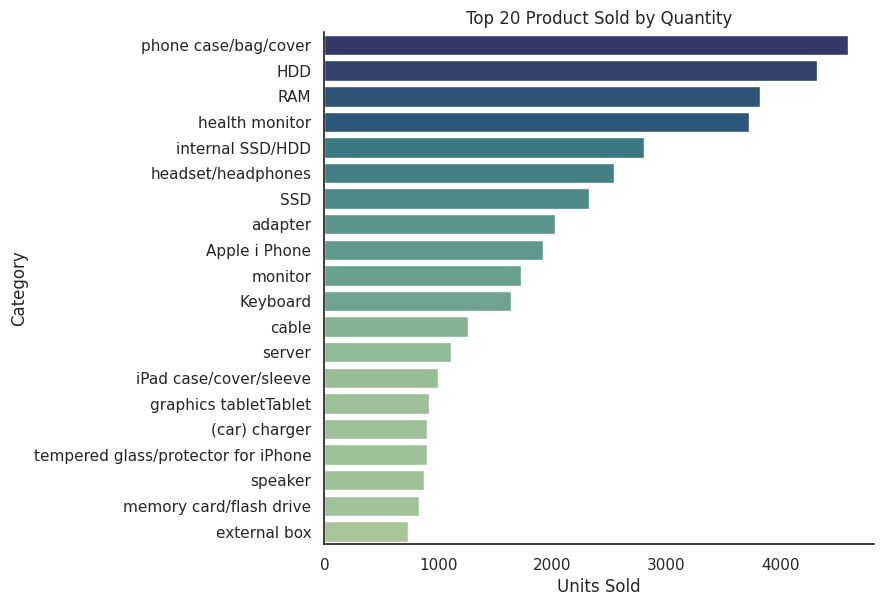

In [302]:
plt.figure(figsize=(10, 5))
top20products_sold_plot = sns.catplot(kind="bar", data=top20products_sold, y='category', x='product_quantity',  hue='product_quantity', palette='crest', height=6, aspect=1.5, legend=False);
plt.title("Top 20 Product Sold by Quantity")
plt.xlabel("Units Sold")
plt.ylabel("Category");

#What are the products that generate the most revenue?

In [303]:
#total_sale_price
merged_orderlines_products['total_sale_price'] = (merged_orderlines_products['unit_price'] * merged_orderlines_products['product_quantity'])
merged_orderlines_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   name              53231 non-null  object 
 8   desc              53231 non-null  object 
 9   price             53231 non-null  float64
 10  in_stock          53231 non-null  int64  
 11  type              53220 non-null  object 
 12  category          53231 non-null  object 
 13  total_sale_price  53231 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 5.7+ MB


In [304]:
#exclude Other and repair service
excluded_categories = ['Other', 'repair service']
nogoproducts_df = merged_orderlines_products[~merged_orderlines_products['category'].isin(excluded_categories)].copy()
nogoproducts_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,total_sale_price
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,support/stand/docking station,60.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,health monitor,142.49
5,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,headset/headphones,256.49
6,1119155,299564,0,1,SAT0010,18.99,2017-01-01 02:43:37,Satechi Aluminum Silver Mouse,Aluminum mat with ultra soft non-slip surface ...,29.99,1,1387,mouse,18.99
7,1119181,299571,0,1,SYN0139,166.24,2017-01-01 04:00:44,Synology DS216j NAS Server Mac and PC,NAS server 2 bays and 2 USB 3.0 high-speed por...,175.99,0,12175397,server,166.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53215,1649397,527024,0,1,APP0927,13.99,2018-03-14 11:36:24,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99
53218,1649429,527033,0,1,APP0927,13.99,2018-03-14 11:40:54,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99
53222,1649438,527036,0,1,APP0927,13.99,2018-03-14 11:41:38,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99
53224,1649441,527034,0,1,APP0927,13.99,2018-03-14 11:42:01,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99


In [305]:
# Flag items sold at a discount
nogoproducts_df['discounted_Y/N'] = nogoproducts_df['unit_price'] < nogoproducts_df['price']
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
dtypes: bool(1), float64(3), int64(5), object(6)
memory usage: 5.7+ MB


In [306]:
nogoproducts_df["total_discount"] = (nogoproducts_df["price"] - nogoproducts_df["unit_price"]) * nogoproducts_df["product_quantity"]

In [307]:
#percentage of discount
nogoproducts_df["discount%"] = ((nogoproducts_df["total_discount"]/nogoproducts_df["price"])*100).round(2)
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
 15  total_discount    40911 non-null  float64
 16  discount%         40911 non-null  float64
dty

In [308]:
nogoproducts_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,total_sale_price,discounted_Y/N,total_discount,discount%
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,support/stand/docking station,60.90,True,16.09,20.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,health monitor,142.49,True,157.50,52.50
5,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,headset/headphones,256.49,True,43.46,14.49
6,1119155,299564,0,1,SAT0010,18.99,2017-01-01 02:43:37,Satechi Aluminum Silver Mouse,Aluminum mat with ultra soft non-slip surface ...,29.99,1,1387,mouse,18.99,True,11.00,36.68
7,1119181,299571,0,1,SYN0139,166.24,2017-01-01 04:00:44,Synology DS216j NAS Server Mac and PC,NAS server 2 bays and 2 USB 3.0 high-speed por...,175.99,0,12175397,server,166.24,True,9.75,5.54


In [309]:
nogoproducts_df['total_sale_price'] = (nogoproducts_df['unit_price'] * nogoproducts_df['product_quantity'])

In [310]:
top20revenue_by_category = nogoproducts_df.groupby('category')['total_sale_price'].sum().sort_values(ascending=False).head(20).reset_index()
top20revenue_by_category

,category,total_sale_price
0,Apple i Phone,1106808.98
1,HDD,738576.55
2,monitor,656947.12
3,server,460434.85
4,SSD,451277.53
5,RAM,387748.96
6,internal SSD/HDD,385262.34
7,OtherTablet,360545.08
8,health monitor,284288.31
9,headset/headphones,257855.65


In [311]:
total_revenue = top20revenue_by_category['total_sale_price'].sum()
top20revenue_by_category['Percentage_Contribution'] = (top20revenue_by_category['total_sale_price'] / total_revenue) * 100
top20revenue_by_category

,category,total_sale_price,Percentage_Contribution
0,Apple i Phone,1106808.98,17.60
1,HDD,738576.55,11.74
2,monitor,656947.12,10.45
3,server,460434.85,7.32
4,SSD,451277.53,7.18
5,RAM,387748.96,6.17
6,internal SSD/HDD,385262.34,6.13
7,OtherTablet,360545.08,5.73
8,health monitor,284288.31,4.52
9,headset/headphones,257855.65,4.10


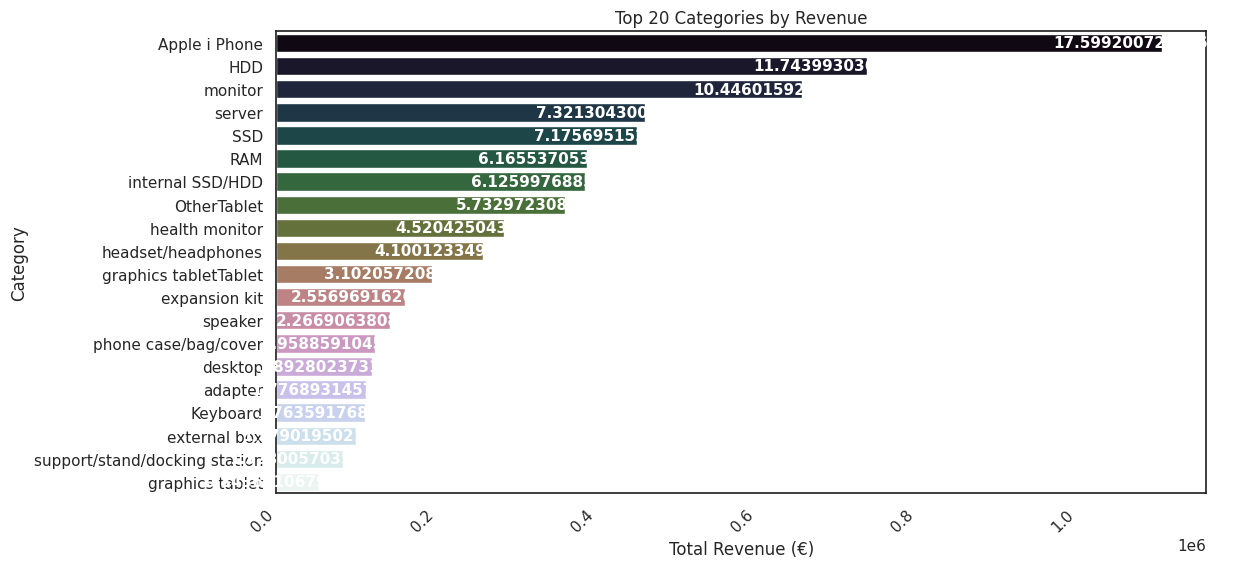

In [312]:
plt.figure(figsize=(12, 6))
#% of contribution
ax =sns.barplot(data=top20revenue_by_category, y='category', x='total_sale_price', palette='cubehelix')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Categories by Revenue")
plt.ylabel("Category")
plt.xlabel("Total Revenue (€)")
for i,p in enumerate(ax.patches):
    ax.annotate(
top20revenue_by_category['Percentage_Contribution'].iloc[i],                 # value to show
        (p.get_width(), p.get_y() + p.get_height() / 2.),  # position
        ha='center', va='center',                     # alignment
        xytext=(-15, 0),                              # shift left into bar
        textcoords='offset points',
        color="white", fontsize=11, fontweight="bold"
    );

In [313]:
#What is the distribution of product prices across different categories?
#SIGNIFICNANCE:how product prices vary within and between product categories

In [314]:
#grouping the dataset by product category, and focusing on the unit_price column and calculating aggregated statistics for each category:.
price_summary = (
    nogoproducts_df
    .groupby('category')['unit_price']
    .agg(['count', 'mean', 'std', 'min', 'max', 'median', 'quantile'])
    .sort_values('mean', ascending=False)
)
#Sorts the categories in descending order of average unit price, so the most expensive categories appear first.
print(price_summary.head(10)) #result Displays the top 10 categories with the highest average prices

                                     count   mean    std    min    max  \
category                                                                 
desktop                                151 733.75 164.76 318.99 993.59   
OtherTablet                            602 576.13 210.61  30.57 999.00   
Apple i Phone                         1869 573.82 212.15 338.02 998.62   
support/stand/docking stationTablet     18 511.57 268.35  54.20 890.27   
server                                1093 414.37 196.27  82.99 992.37   
monitor                               1489 388.57 193.12  99.00 999.00   
speakerTablet                            5 253.99  13.42 229.99 259.99   
graphics tabletTablet                  810 225.09 191.56  45.45 974.00   
expansion kit                          707 221.81  87.77  19.61 750.58   
OtherApple ipod                         54 210.05  60.22  52.99 321.99   

                                     median  quantile  
category                                               

Significance of This Analysis:

Helps identify high-value categories (e.g., luxury items).

Useful for pricing strategy, inventory focus, or targeted marketing.

std shows whether a category has consistent pricing or wide variability.

You could later flag categories with high average but low variability (suggesting stable high-margin products).

In [315]:
# product_category_df.csv
url = "https://drive.google.com/file/d/1_Jzth7FlqUmVZbf4S8K7K-Xh-3VuGwAX/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
product_category_df = pd.read_csv(path)

In [316]:
#product_category_df.head()

In [317]:
#product_count = product_category_df['category'].value_counts()

In [318]:
#threshold = 50
#categories_to_exclude = product_count[(product_count < threshold) | (product_count.index == '')].index

In [319]:
#product_category_df_filtered = product_category_df[~product_category_df['category'].isin(categories_to_exclude)]

In [320]:
#product_df = product_category_df_filtered.copy()
#product_df
#product_df["category"].value_counts()

#Finds the top 10 most frequent product categories (based on number of products) as Boxplot

In [321]:
#Finds the top 10 most frequent product categories (based on number of products).
top10_categories = nogoproducts_df['category'].value_counts().head(10).index.tolist()
top10_categories

['phone case/bag/cover',
 'HDD',
 'health monitor',
 'RAM',
 'headset/headphones',
 'SSD',
 'Apple i Phone',
 'internal SSD/HDD',
 'adapter',
 'monitor']

In [322]:
filtered_df = nogoproducts_df[nogoproducts_df['category'].isin(top10_categories)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25833 entries, 4 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25833 non-null  int64  
 1   id_order          25833 non-null  int64  
 2   product_id        25833 non-null  int64  
 3   product_quantity  25833 non-null  int64  
 4   sku               25833 non-null  object 
 5   unit_price        25833 non-null  float64
 6   date              25833 non-null  object 
 7   name              25833 non-null  object 
 8   desc              25833 non-null  object 
 9   price             25833 non-null  float64
 10  in_stock          25833 non-null  int64  
 11  type              25824 non-null  object 
 12  category          25833 non-null  object 
 13  total_sale_price  25833 non-null  float64
 14  discounted_Y/N    25833 non-null  bool   
 15  total_discount    25833 non-null  float64
 16  discount%         25833 non-null  float64
dty

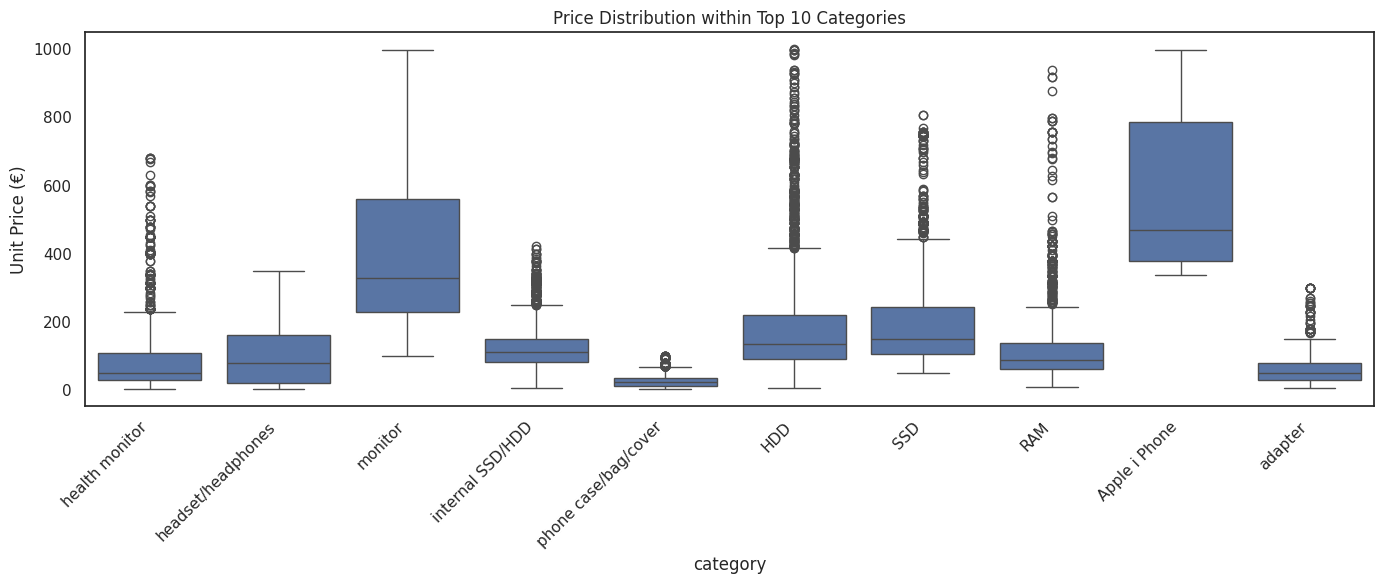

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

sns.boxplot(data=filtered_df,
            x='category', y='unit_price')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Unit Price (€)')
plt.title('Price Distribution within Top 10 Categories')
plt.tight_layout()
plt.show()

Significance of the Boxplot:

-Shows price variability within categories.

-Helps identify:

  + Categories with wide price ranges (diverse product lines).

  + Outliers (premium or unusually priced products).

  + Categories with tightly clustered prices (standardized or low-variation products).

  + Useful for category managers and pricing analysts to explore product mix and pricing structure.

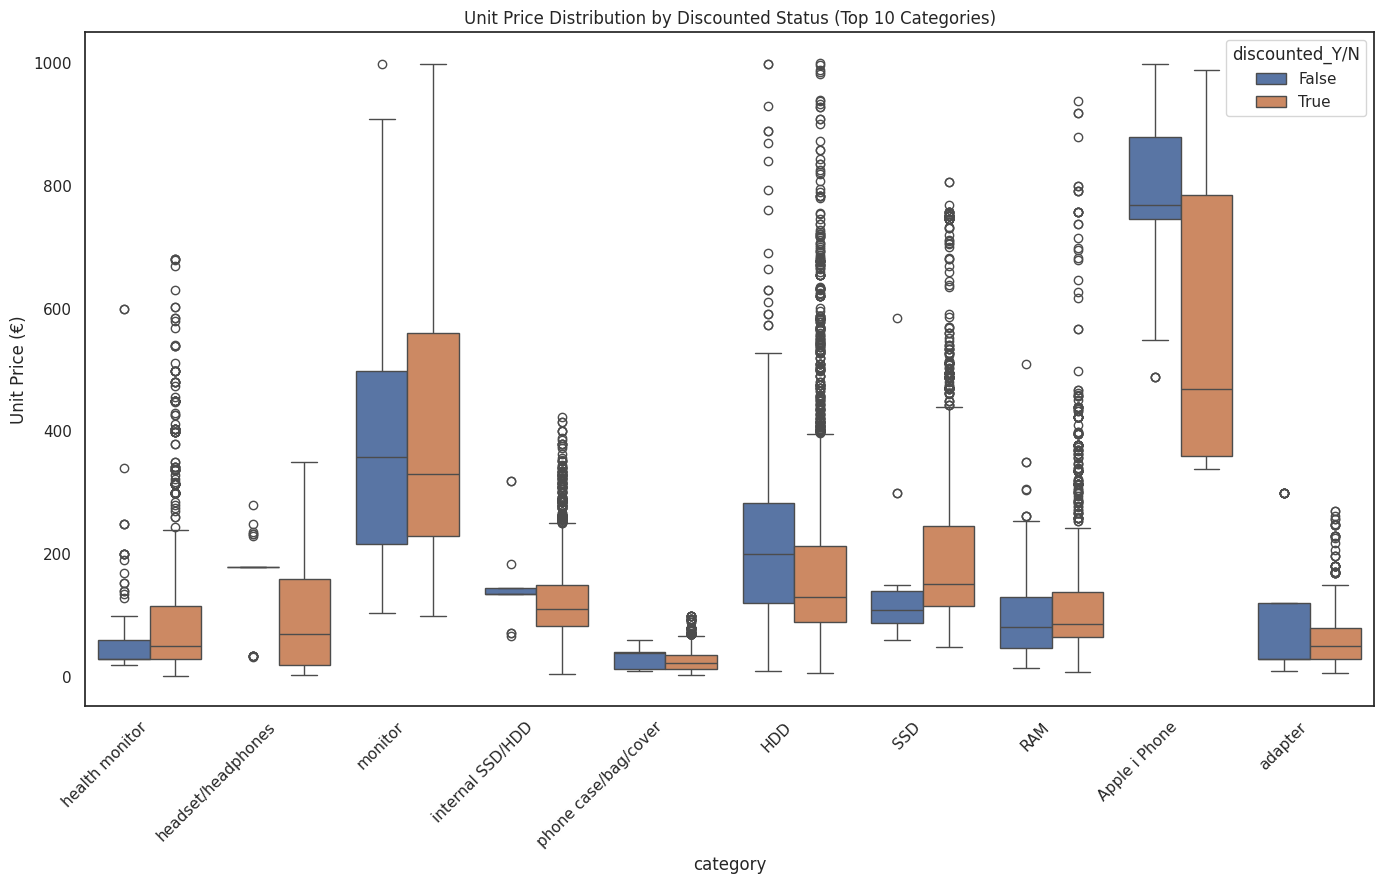

In [324]:
plt.figure(figsize=(14, 9))
sns.boxplot(data=filtered_df, x='category', y='unit_price', hue='discounted_Y/N')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Unit Price (€)')
plt.title('Unit Price Distribution by Discounted Status (Top 10 Categories)')
plt.tight_layout()
plt.savefig('unit_price_boxplot.png', dpi=300)
plt.show()

In [325]:
from google.colab import files
files.download('unit_price_boxplot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [326]:
#Aggregate Key Metrics by Category
category_metrics = (
    nogoproducts_df
    .groupby('category')
    .agg(
        avg_price=('unit_price', 'mean'),
        price_std=('unit_price', 'std'),
        total_units=('product_quantity', 'sum'),
        total_revenue=('total_sale_price', 'sum')

    )
    .reset_index()
)
category_metrics = category_metrics.sort_values(by='total_revenue', ascending=False)
category_metrics.head(10)

,category,avg_price,price_std,total_units,total_revenue
1,Apple i Phone,573.82,212.15,1922,1106808.98
2,HDD,179.65,150.18,4324,738576.55
27,monitor,388.57,193.12,1722,656947.12
32,server,414.37,196.27,1114,460434.85
8,SSD,199.91,139.45,2322,451277.53
7,RAM,109.02,93.25,3822,387748.96
25,internal SSD/HDD,133.17,73.67,2807,385262.34
6,OtherTablet,576.13,210.61,631,360545.08
20,health monitor,81.74,85.25,3723,284288.31
19,headset/headphones,106.47,93.20,2541,257855.65


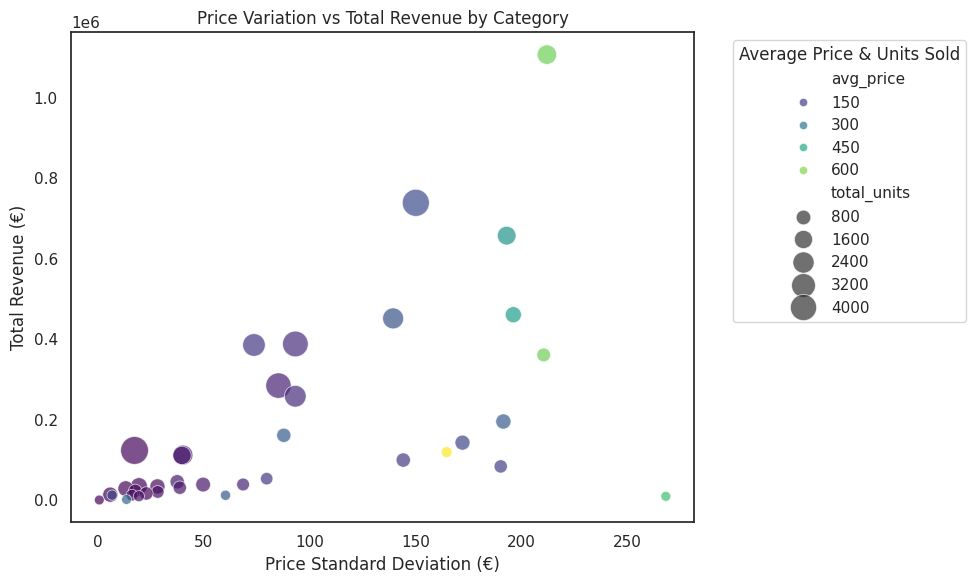

In [327]:
#Plot Price Variation vs Volume or Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=category_metrics,
    x='price_std',
    y='total_revenue',
    size='total_units',
    sizes=(50, 400),
    hue='avg_price',
    palette='viridis',
    alpha=0.7,
    legend='brief'
)
plt.title('Price Variation vs Total Revenue by Category')
plt.xlabel('Price Standard Deviation (€)')
plt.ylabel('Total Revenue (€)')
plt.legend(title='Average Price & Units Sold', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


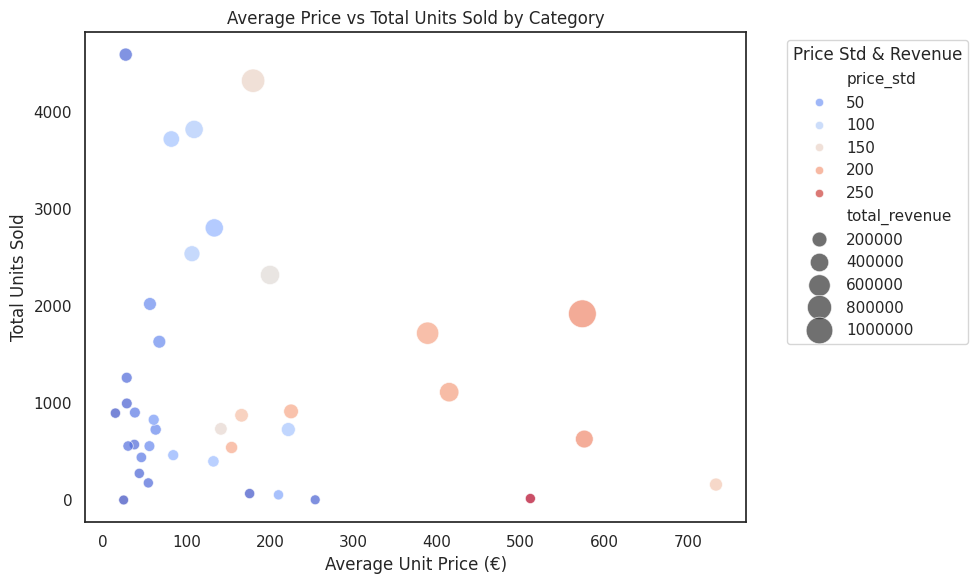

In [328]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=category_metrics,
    x='avg_price',
    y='total_units',
    size='total_revenue',
    sizes=(50, 400),
    hue='price_std',
    palette='coolwarm',
    alpha=0.7,
    legend='brief'
)
plt.title('Average Price vs Total Units Sold by Category')
plt.xlabel('Average Unit Price (€)')
plt.ylabel('Total Units Sold')
plt.legend(title='Price Std & Revenue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


High price variation (std) + high revenue: Indicates a broad product range, maybe multiple tiers.

Low price variation + high revenue: Consistent pricing strategy, potentially premium products.

High avg price + low units: Premium category with niche customers.

Low avg price + high units: Mass market or budget segment.

In [329]:
#How many products are being discounted?
# Count of discounted vs non-discounted
discount_counts = nogoproducts_df['discounted_Y/N'].value_counts().rename(index={True: 'Discounted', False: 'Not Discounted'}).reset_index()
discount_counts

,discounted_Y/N,count
0,Discounted,38611
1,Not Discounted,2300


In [330]:
total = discount_counts['count'].sum()

In [331]:
#renaming the columns
discount_counts.columns = ['Discount Status', 'Count']
discount_counts

,Discount Status,Count
0,Discounted,38611
1,Not Discounted,2300


In [332]:
total = discount_counts['Count'].sum()
discount_counts['Percentage'] = (discount_counts['Count'] / total * 100).round(2)
discount_counts

,Discount Status,Count,Percentage
0,Discounted,38611,94.38
1,Not Discounted,2300,5.62


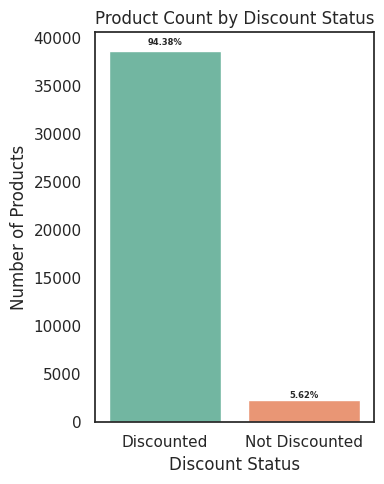

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
discounts_percentage_plot = sns.barplot(data=discount_counts, x='Discount Status', y='Count', palette='Set2')

# Add percentage labels on top of bars
for index, row in discount_counts.iterrows():
    discounts_percentage_plot.text(
        x=index,
        y=row['Count'] + row['Count'] * 0.01,  # a little above the bar
        s=f"{row['Percentage']}%",
        ha='center',
        va='bottom',
        fontsize=6,
        weight='bold'
    )

plt.title("Product Count by Discount Status")
plt.xlabel("Discount Status")
plt.ylabel("Number of Products")
plt.tight_layout()

#How large are the discounts typically offered on products?"

In [334]:
# Flag items sold at a discount
nogoproducts_df['discounted_Y/N'] = nogoproducts_df['unit_price'] < nogoproducts_df['price']
nogoproducts_df['total_discount'] = nogoproducts_df['price'] - nogoproducts_df['unit_price']
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
 15  total_discount    40911 non-null  float64
 16  discount%         40911 non-null  float64
dty

In [335]:
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
 15  total_discount    40911 non-null  float64
 16  discount%         40911 non-null  float64
dty

In [336]:
#percentage of discount
nogoproducts_df["discount%"] = ((nogoproducts_df["total_discount"]/nogoproducts_df["price"])*100).round(2)
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
 15  total_discount    40911 non-null  float64
 16  discount%         40911 non-null  float64
dty

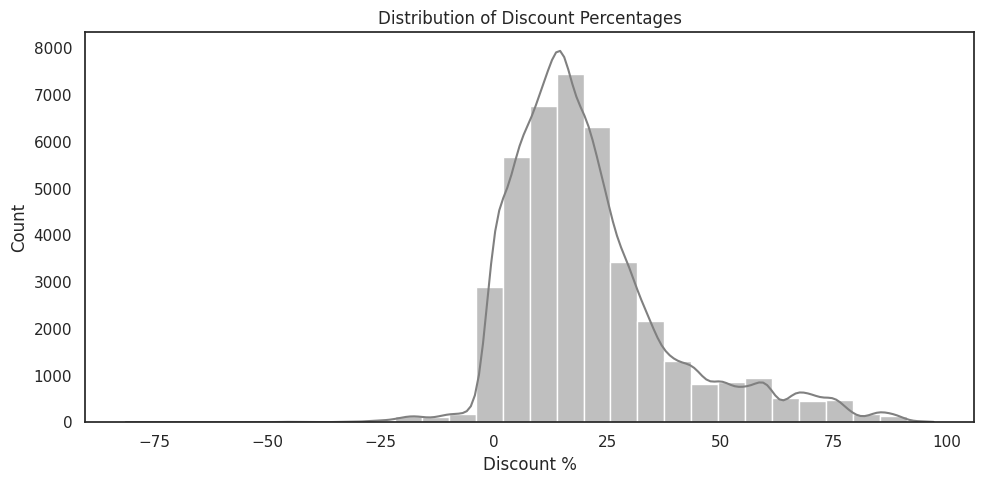

In [337]:
#How big are the offered discounts as a percentage of the product prices?
plt.figure(figsize=(10, 5))
sns.histplot(nogoproducts_df['discount%'], bins=30, color='gray', kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount %')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('discount_distribution.png', dpi=300)
plt.show()

In [338]:
from google.colab import files
files.download('discount_distribution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#"How large are the discounts typically offered on products?"

Where most discounts cluster — e.g., 10–20%, or 40–50%.

Whether there are standard discount tiers (like 10%, 25%, 50%, etc.).

If some products get huge discounts (maybe clearance items).

Whether most discounts are small, or deep discounts are common.

In [339]:
print(nogoproducts_df['discount%'].describe())

count   40911.00
mean       20.87
std        17.87
min       -81.34
25%         9.10
50%        16.69
75%        27.75
max        97.14
Name: discount%, dtype: float64


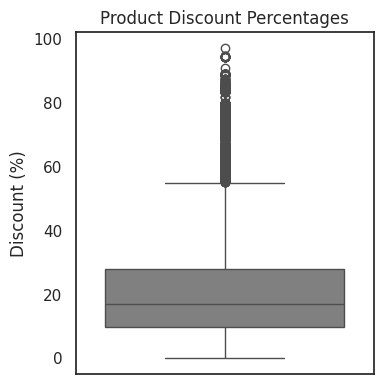

In [340]:
nogoproducts_cleaned = nogoproducts_df[nogoproducts_df['discount%'] >= 0]

plt.figure(figsize=(4, 4))
sns.boxplot(data=nogoproducts_cleaned, y='discount%', color='gray')

plt.title("Product Discount Percentages")
plt.ylabel("Discount (%)")
plt.tight_layout()
plt.show()

In [341]:
#A vertical box representing the middle 50% of discounts (25th to 75th percentile).
#A line inside the box = median (~16.7% in your case).
#Whiskers showing general spread.
#Dots outside whiskers = outliers, such as 90%+ discounts.
#Are most discounts tightly clustered or spread out?
#Are there a lot of outliers (very high discounts)? YES
#Is the distribution skewed (e.g., more small discounts, few big ones)?
#Is there evidence of data issues (e.g., extreme values, even after filtering negatives)?

In [342]:
#How should products be classified into different categories to simplify reports and analysis? NABA

In [343]:
# what is the impact of DISCOUNT
#Which categories drive more revenue when discounted

#Whether some categories rely more on discounting than others

#Where discounting may be ineffective or unnecessary

#“Do higher discounts in a category lead to more total revenue?”
Find Most Profitable Discount Rates by Category

In [344]:
#we use category, discount& and total_sale_price. Cost is unknown so total_sale_price will be our revenue
nogoproducts_df

nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
 15  total_discount    40911 non-null  float64
 16  discount%         40911 non-null  float64
dty

In [345]:
nogoproducts_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,category,total_sale_price,discounted_Y/N,total_discount,discount%
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,support/stand/docking station,60.90,True,16.09,20.90
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,Pebble Smartwatch Time Steel Black,Bluetooth Smart Watch with steel case leather ...,299.99,0,11905404,health monitor,142.49,True,157.50,52.50
5,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,Solo3 Beats Headphones Wireless On-Ear Rose Gold,Bluetooth helmets integrated chip W1 40h batte...,299.95,0,5384,headset/headphones,256.49,True,43.46,14.49
6,1119155,299564,0,1,SAT0010,18.99,2017-01-01 02:43:37,Satechi Aluminum Silver Mouse,Aluminum mat with ultra soft non-slip surface ...,29.99,1,1387,mouse,18.99,True,11.00,36.68
7,1119181,299571,0,1,SYN0139,166.24,2017-01-01 04:00:44,Synology DS216j NAS Server Mac and PC,NAS server 2 bays and 2 USB 3.0 high-speed por...,175.99,0,12175397,server,166.24,True,9.75,5.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53215,1649397,527024,0,1,APP0927,13.99,2018-03-14 11:36:24,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99,True,21.01,60.03
53218,1649429,527033,0,1,APP0927,13.99,2018-03-14 11:40:54,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99,True,21.01,60.03
53222,1649438,527036,0,1,APP0927,13.99,2018-03-14 11:41:38,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99,True,21.01,60.03
53224,1649441,527034,0,1,APP0927,13.99,2018-03-14 11:42:01,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,headset/headphones,13.99,True,21.01,60.03


In [346]:
from google.colab import files

nogoproducts_df.to_csv('nogoproducts_df.csv', index=False)
files.download('nogoproducts_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [347]:
#Group by Category and Compute Summary
category_summary = nogoproducts_df.groupby('category').agg({'discount%': 'mean','total_sale_price': 'sum'}).reset_index()

In [348]:
#Rename the column of category_summary
category_summary.columns = ['Category', 'Avg_Discount_Rate', 'Total_Revenue']

In [349]:
#Sort to see which discount rates are most profitable by sorting the total_revenue
#which categories generate the most revenue and what their average discount rate is.
category_summary = category_summary.sort_values(by='Total_Revenue', ascending=False)
print(category_summary.head(20))

                         Category  Avg_Discount_Rate  Total_Revenue
1                   Apple i Phone               6.70     1106808.98
2                             HDD              16.12      738576.55
27                        monitor              11.76      656947.12
32                         server               7.83      460434.85
8                             SSD              13.80      451277.53
7                             RAM              13.91      387748.96
25               internal SSD/HDD              18.72      385262.34
6                     OtherTablet               6.20      360545.08
20                 health monitor              21.08      284288.31
19             headset/headphones              28.82      257855.65
18          graphics tabletTablet              21.07      195087.54
14                  expansion kit              21.49      160807.10
33                        speaker              21.53      142565.13
31           phone case/bag/cover              3

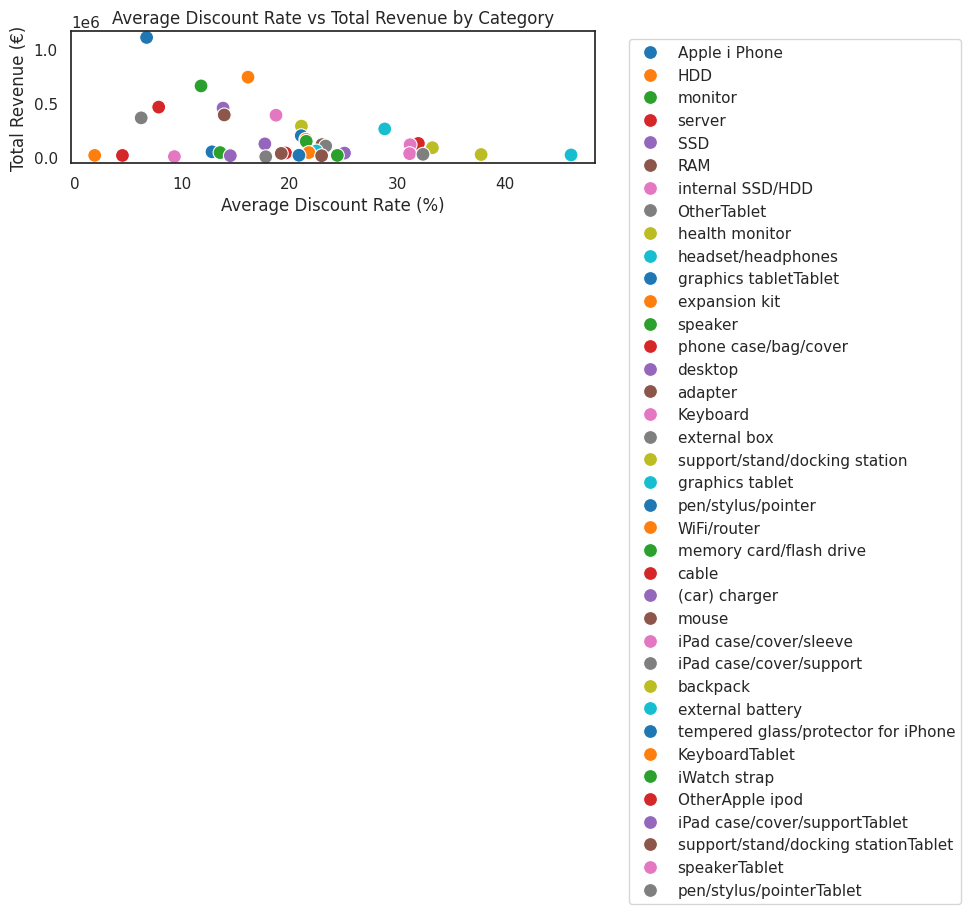

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=category_summary,
    x='Avg_Discount_Rate',
    y='Total_Revenue',
    hue='Category',
    palette='tab10',
    s=100
)

plt.title("Average Discount Rate vs Total Revenue by Category")
plt.xlabel("Average Discount Rate (%)")
plt.ylabel("Total Revenue (€)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Interpretation:
#High revenue + low discount rate = strong product category
#High discount + low revenue = discounts not helping
#Middle discount + high revenue = potentially optimal rate

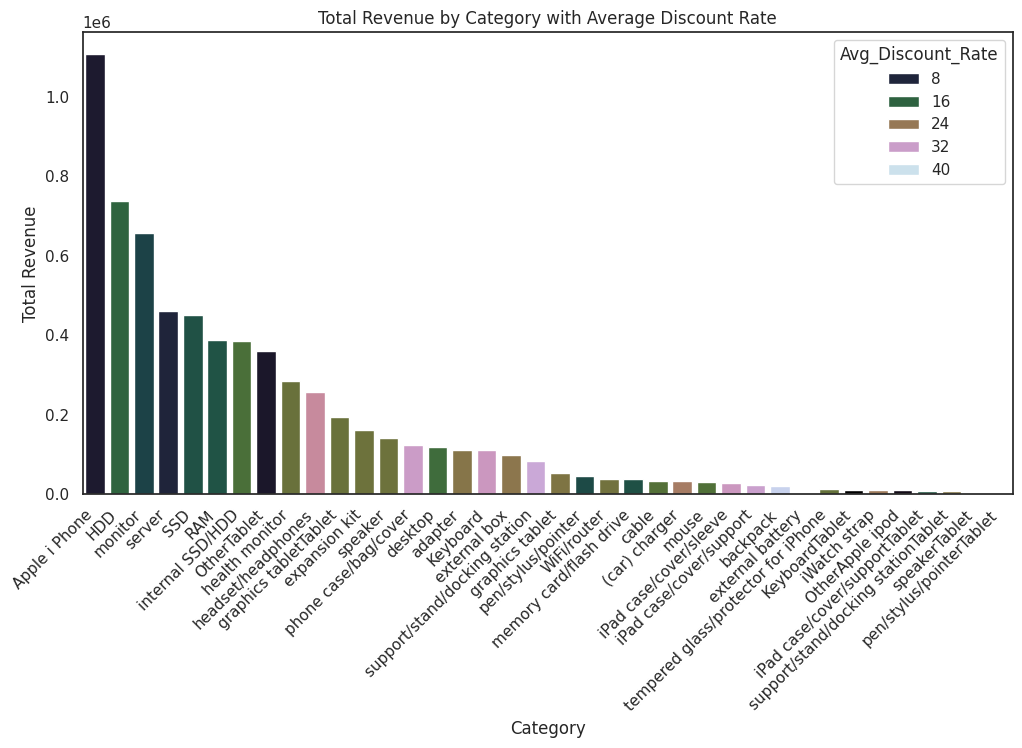

In [351]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=category_summary,  # should have avg_discount and total_revenue per category
    x='Category',
    y='Total_Revenue',
    palette='cubehelix',
    hue='Avg_Discount_Rate'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Category with Average Discount Rate")
plt.show()

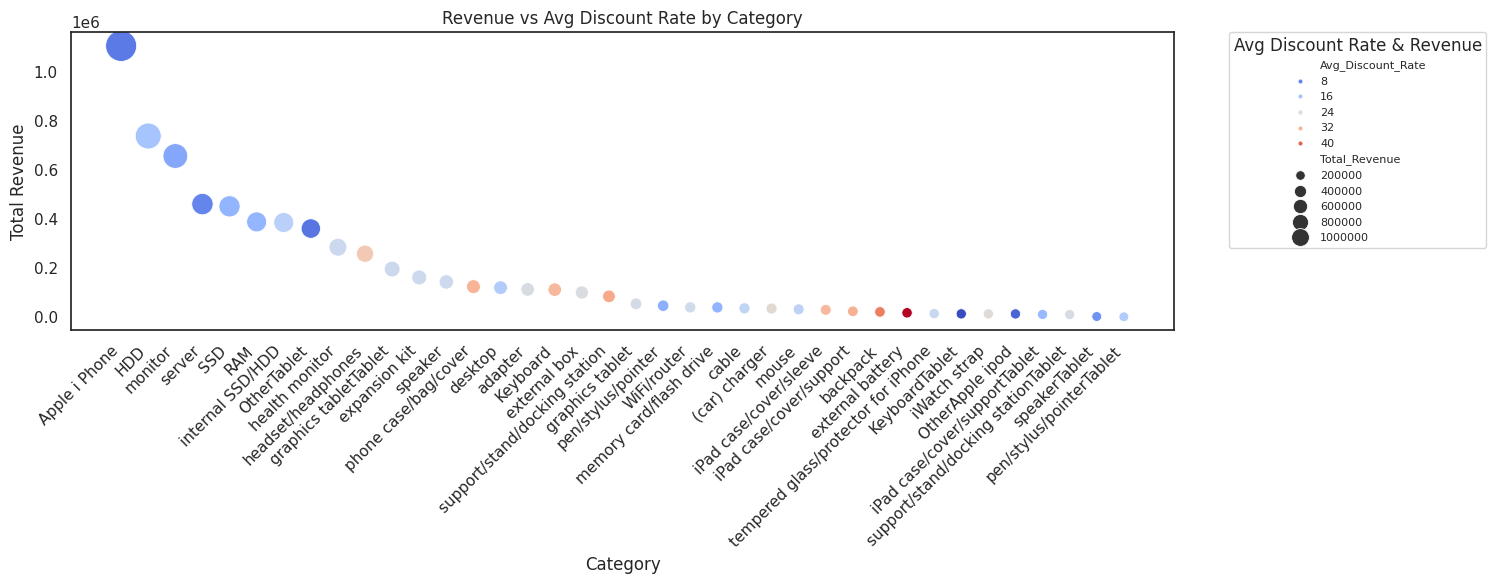

In [352]:
Revenue_AvgDiscountRate_byCategory_plot =plt.figure(figsize=(12,6))
sns.scatterplot(data=category_summary, x='Category',y='Total_Revenue',size='Total_Revenue',hue='Avg_Discount_Rate',palette='coolwarm',sizes=(50, 500), legend='brief')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Revenue")
plt.title("Revenue vs Avg Discount Rate by Category")
plt.tight_layout()

plt.legend(title='Avg Discount Rate & Revenue',bbox_to_anchor=(1.05, 1),loc='upper left',borderaxespad=0,frameon=True,prop={'size': 8},markerscale=0.6)
plt.show()

#Which discount % ranges are most effective in driving sales
#High revenue, low avg discount	Strong product demand — doesn’t need discounting to sell
#High revenue, high avg discount	Discounting may boost volume, but margins could be tight
#Low revenue, high avg discount	Discounts not working — customers still not buying
#Mid-range discount, high revenue	Possible optimal discount range for price-sensitive products

In [353]:
# Save the figure to a PNG file
Revenue_AvgDiscountRate_byCategory_plot.savefig("Revenue_AvgDiscountRate_byCategory_plot.png")

# Download the file in Google Colab
from google.colab import files
files.download("Revenue_AvgDiscountRate_byCategory_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Revenue declines exponentially as average discount rate increases across categories.Categories with higher discounts are not generating proportionally higher revenue.Heavy discounting does not lead to better sales

Discount Status Counts & Revenue over time/visualize how discounts influence monthly revenue trends.Plot two revenue lines over time:One for discounted products. One for non-discounted products. Are discounted products generating more revenue in certain months?

In [354]:
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40911 non-null  int64  
 1   id_order          40911 non-null  int64  
 2   product_id        40911 non-null  int64  
 3   product_quantity  40911 non-null  int64  
 4   sku               40911 non-null  object 
 5   unit_price        40911 non-null  float64
 6   date              40911 non-null  object 
 7   name              40911 non-null  object 
 8   desc              40911 non-null  object 
 9   price             40911 non-null  float64
 10  in_stock          40911 non-null  int64  
 11  type              40902 non-null  object 
 12  category          40911 non-null  object 
 13  total_sale_price  40911 non-null  float64
 14  discounted_Y/N    40911 non-null  bool   
 15  total_discount    40911 non-null  float64
 16  discount%         40911 non-null  float64
dty

In [355]:
nogoproducts_df['date'] = pd.to_datetime(nogoproducts_df['date'])
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                40911 non-null  int64         
 1   id_order          40911 non-null  int64         
 2   product_id        40911 non-null  int64         
 3   product_quantity  40911 non-null  int64         
 4   sku               40911 non-null  object        
 5   unit_price        40911 non-null  float64       
 6   date              40911 non-null  datetime64[ns]
 7   name              40911 non-null  object        
 8   desc              40911 non-null  object        
 9   price             40911 non-null  float64       
 10  in_stock          40911 non-null  int64         
 11  type              40902 non-null  object        
 12  category          40911 non-null  object        
 13  total_sale_price  40911 non-null  float64       
 14  discounted_Y/N    40911 non

In [356]:
nogoproducts_df['year_month'] = nogoproducts_df['date'].dt.to_period('M').dt.to_timestamp()

In [357]:
nogoproducts_df['year_month'] = nogoproducts_df['year_month'].dt.to_period('M')

In [358]:
nogoproducts_df['year_month'] = nogoproducts_df['year_month'].astype(str)

In [359]:
monthly_revenue_by_discount = nogoproducts_df.groupby(['year_month', 'discounted_Y/N'])['total_sale_price'].sum().reset_index()
monthly_revenue_by_discount.head()

,year_month,discounted_Y/N,total_sale_price
0,2017-01,False,75118.66
1,2017-01,True,455882.74
2,2017-02,False,44478.59
3,2017-02,True,246925.43
4,2017-03,False,6040.38


In [360]:
#grouping the boolean from discounted_Y/N to labels before plotting
monthly_revenue_by_discount['discounted_Y/N'] = monthly_revenue_by_discount['discounted_Y/N'].map({True: 'Discounted',False:'Not Discounted'})

In [361]:
#monthly_revenue_by_discount['year_month'] = pd.to_numeric(monthly_revenue_by_discount['year_month'], errors='coerce')

In [362]:
monthly_revenue_by_discount.head()

,year_month,discounted_Y/N,total_sale_price
0,2017-01,Not Discounted,75118.66
1,2017-01,Discounted,455882.74
2,2017-02,Not Discounted,44478.59
3,2017-02,Discounted,246925.43
4,2017-03,Not Discounted,6040.38


In [363]:
monthly_revenue_by_discount['year_month'] = monthly_revenue_by_discount['year_month'].astype(str)

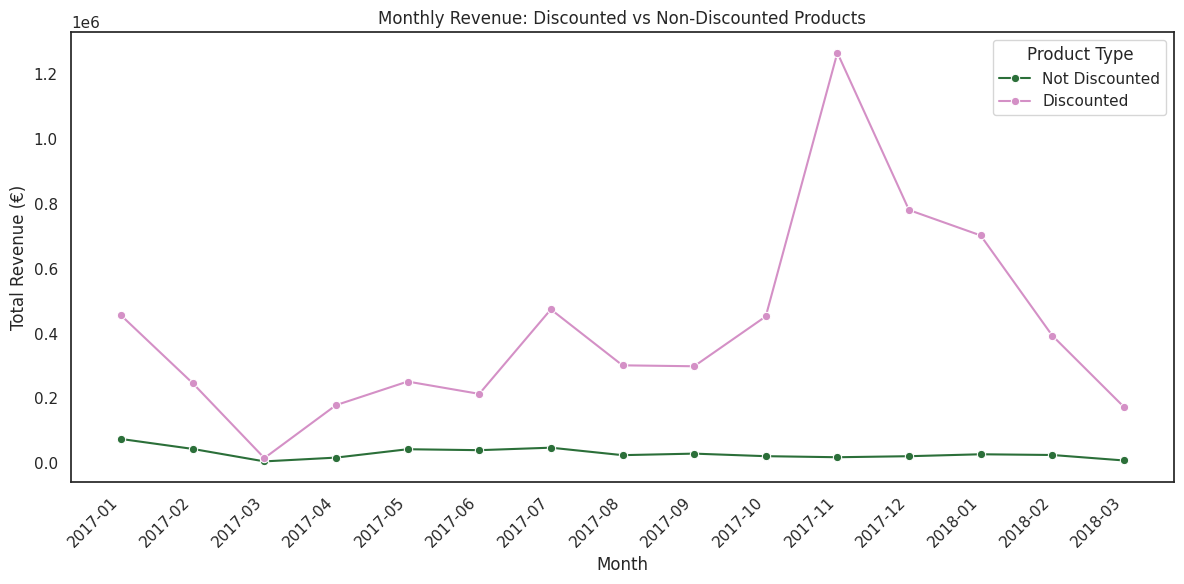

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_revenue_by_discount, x='year_month', y='total_sale_price', hue='discounted_Y/N',marker='o', palette='cubehelix')

plt.title("Monthly Revenue: Discounted vs Non-Discounted Products")
plt.xlabel("Month")
plt.ylabel("Total Revenue (€)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Product Type")
plt.tight_layout()
plt.savefig('monthly_revenue_discounted_vs_non_discounted.png', dpi=300)
plt.show()

In [365]:
from google.colab import files
files.download('monthly_revenue_discounted_vs_non_discounted.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Profitability Analysis. Does discounting drive profit?
estimated_net_gain (proxy for profit)
= total_sale_price - total_discount_given

In [366]:
nogoproducts_df['discounted_Y/N'] = nogoproducts_df['unit_price'] < nogoproducts_df['price']
nogoproducts_df['total_discount'] = nogoproducts_df['price'] - nogoproducts_df['unit_price']
nogoproducts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40911 entries, 3 to 53225
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                40911 non-null  int64         
 1   id_order          40911 non-null  int64         
 2   product_id        40911 non-null  int64         
 3   product_quantity  40911 non-null  int64         
 4   sku               40911 non-null  object        
 5   unit_price        40911 non-null  float64       
 6   date              40911 non-null  datetime64[ns]
 7   name              40911 non-null  object        
 8   desc              40911 non-null  object        
 9   price             40911 non-null  float64       
 10  in_stock          40911 non-null  int64         
 11  type              40902 non-null  object        
 12  category          40911 non-null  object        
 13  total_sale_price  40911 non-null  float64       
 14  discounted_Y/N    40911 non

In [367]:
nogoproducts_df['date'] = pd.to_datetime(nogoproducts_df['date'])

In [368]:
nogoproducts_df['year_month'] = nogoproducts_df['date'].dt.to_period('M')
nogoproducts_df['year_month']

,year_month
3,2017-01
4,2017-01
5,2017-01
6,2017-01
7,2017-01
...,...
53215,2018-03
53218,2018-03
53222,2018-03
53224,2018-03


In [369]:
nogoproducts_df['discounted_Y/N'] = nogoproducts_df['discounted_Y/N'].map({True: 'Discounted',False:'Not Discounted'})

In [370]:
nogoproducts_df['year_month'] = nogoproducts_df['year_month'].astype(str)

In [371]:
#aggregate
monthly_profit = (nogoproducts_df.groupby(['year_month', 'discounted_Y/N']).agg(total_sale_price=('total_sale_price', 'sum'),total_discount_given=('total_discount', 'sum'))).reset_index()
monthly_profit.head()

,year_month,discounted_Y/N,total_sale_price,total_discount_given
0,2017-01,Discounted,455882.74,116780.34
1,2017-01,Not Discounted,75118.66,-6840.65
2,2017-02,Discounted,246925.43,49107.12
3,2017-02,Not Discounted,44478.59,-3679.29
4,2017-03,Discounted,16246.18,3173.67


In [372]:
#assign margins
margin_map = {'Discounted': 0.15, 'Not Discounted': 0.30}
monthly_profit['assumed_margin'] = monthly_profit['discounted_Y/N'].map(margin_map)
monthly_profit['estimated_profit'] = monthly_profit['total_sale_price'] * monthly_profit['assumed_margin']
monthly_profit.head()

,year_month,discounted_Y/N,total_sale_price,total_discount_given,assumed_margin,estimated_profit
0,2017-01,Discounted,455882.74,116780.34,0.15,68382.41
1,2017-01,Not Discounted,75118.66,-6840.65,0.30,22535.60
2,2017-02,Discounted,246925.43,49107.12,0.15,37038.81
3,2017-02,Not Discounted,44478.59,-3679.29,0.30,13343.58
4,2017-03,Discounted,16246.18,3173.67,0.15,2436.93


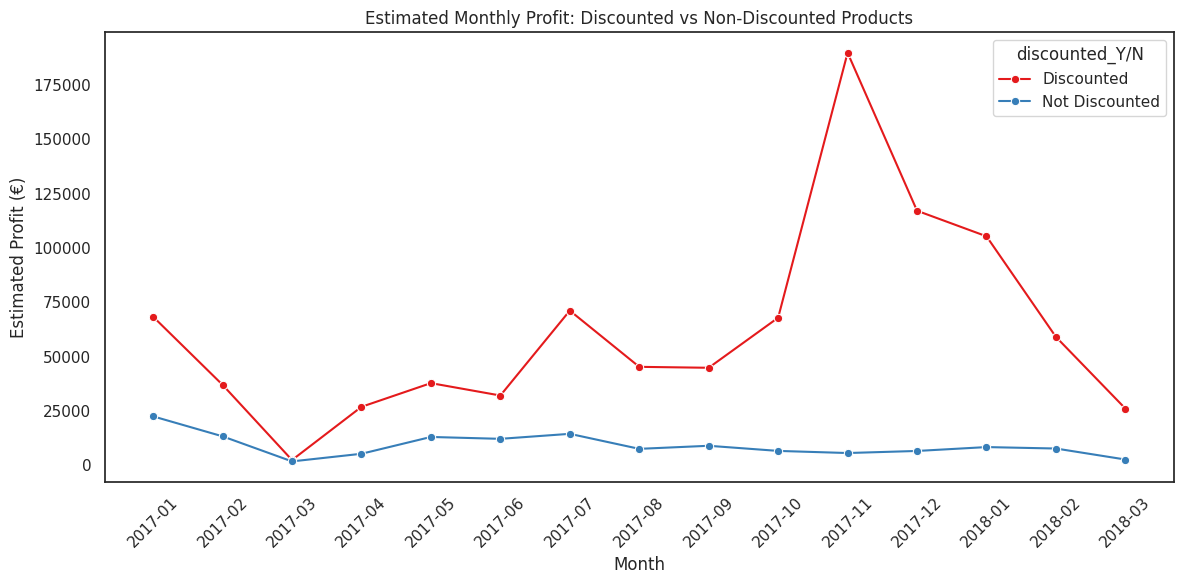

In [373]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_profit,x='year_month',y='estimated_profit',hue='discounted_Y/N',marker='o',palette='Set1')
plt.title("Estimated Monthly Profit: Discounted vs Non-Discounted Products")
plt.ylabel("Estimated Profit (€)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("estimated_monthly_profit.png", dpi=300)
plt.show()

In [374]:
from google.colab import files
files.download("estimated_monthly_profit.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>